In [ ]:
# 1. 글로벌 주가지수의 평가 정도 진단 모델링

## 1.1 목적 : 국가별 주가지수의 고평가/저평가 여부를 진단하여 글로벌 자산배분 포트폴리오를 설계

## 1.2 활용데이터
- 국가별 주가지수: Yahoo Finance, Nikkei, 한국거래소
- 밸류에이션 지표(PBR, PER): 증권거래소, OECD
- 거시경제 지표(GDP, 금리, 인플레이션): IMF
- 환율 : IMF
- 지정학/외교 요인: 텍스트마이닝 또는 리스크 인덱싱 (더미 변수화)

## 1.3 분석방법
- 다변량 선형회귀  
- 시계열 분석 (ARIMA, VAR 등)

## 1.4 강화전략
- 경제학 이론 기반 독립변수 조정
- 정치적 사건, 정책 이슈 등의 외생변수 도입

## 1.5 수익화 방안
- 기관 대상 리서치 보고서 판매 (B2B)
- 개인 대상 자산배분 추천 포트폴리오 유료 알고리즘

## 1.6 검증가능성
- 과거 데이터를 활용한 백테스트
- 무작위 포트폴리오 및 주요지수와 비교한 실용성 검증

In [14]:
#2. 타이타닉 EDA 및 전처리

In [15]:
!pip install seaborn
#라이브러리 설치


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:\MYpython\Titanic-Dataset.csv")

#데이터 구조확인
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\qkrrl\AppData\Local\Temp\ipykernel_25476\525699277.py:3: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\MYpython\Titanic-Dataset.csv")


결측치:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


""
0
1
2
3
4


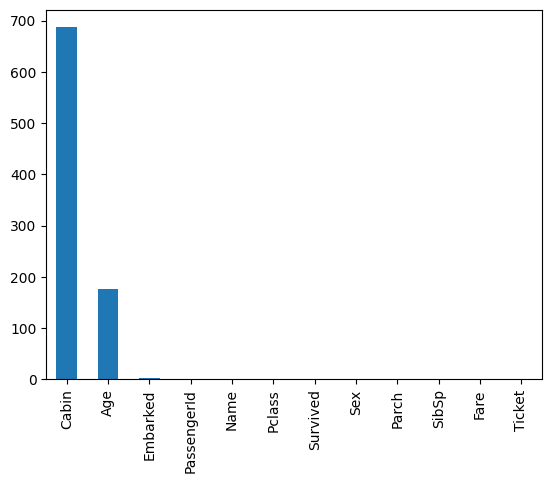

In [35]:
## 결측치 처리
#1. 결측치확인
miss=df.isnull().sum().sort_values(ascending=False)
print("결측치:\n", miss)

#2. 결측치 시각화
miss.plot.bar()

#3. 결측치 많은 열 확인후 삭제
df["Cabin"].head(10)
df_null = df.isnull().sum()
drop_columns=df_null.index.tolist()
clean_df=df.drop(drop_columns,axis=1)
clean_df.head()


In [42]:
#4 기초 통계값
print(df["Fare"].mean(numeric_only=True))
print(df["Fare"].median(numeric_only=True))
print(df["Age"].max(numeric_only=True))
print(df["Age"].min(numeric_only=True))
df.describe()
df.describe(include="object")

32.204207968574636
14.4542
80.0
0.42


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


<Axes: xlabel='Sex', ylabel='Count'>

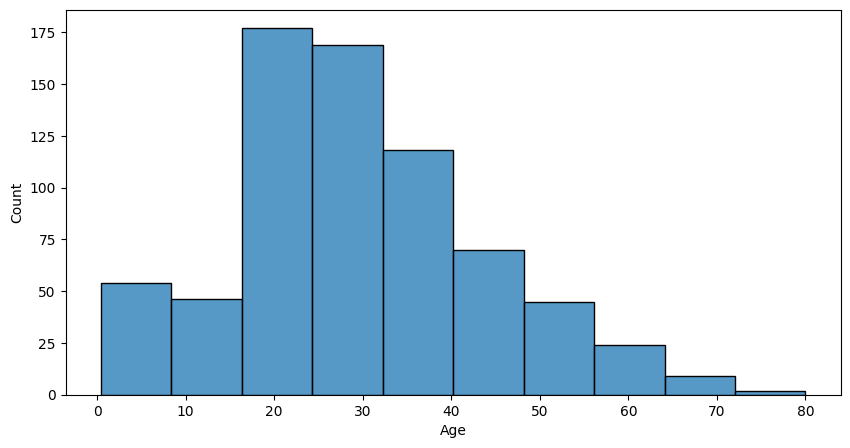

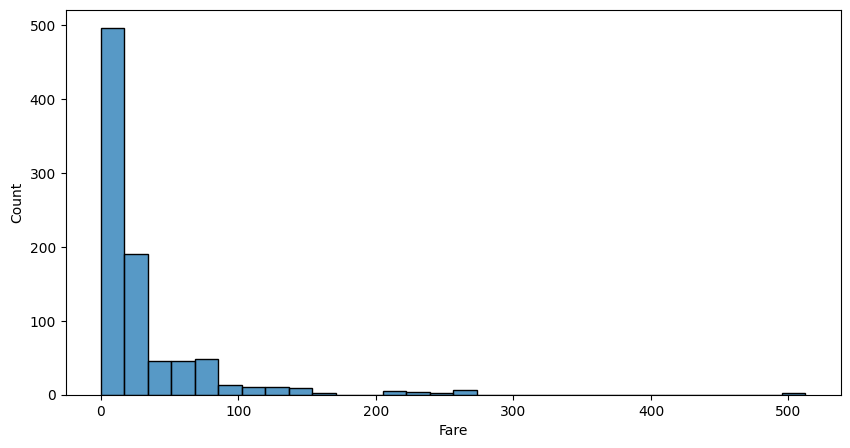

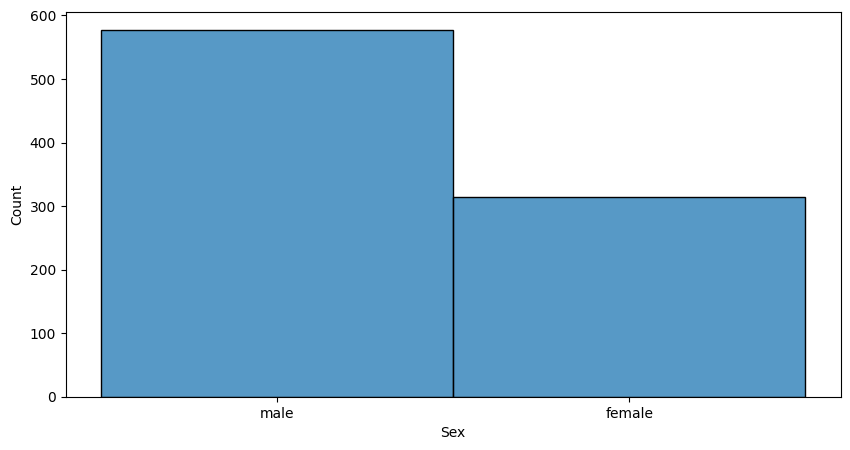

In [ ]:
#5 데이터 시각화
import seaborn as sns
# 나이 분포
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="Age",bins=10)
# 운임 분포
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="Fare",bins=30)
# 성별분포
plt.figure(figsize=(10,5))
sns.histplot(data=df,x="Sex")


C:\Users\qkrrl\AppData\Local\Temp\ipykernel_25476\1734073494.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean()
C:\Users\qkrrl\AppData\Local\Temp\ipykernel_25476\1734073494.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareGroup')['Survived'].mean()


AgeGroup
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64
FareGroup
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


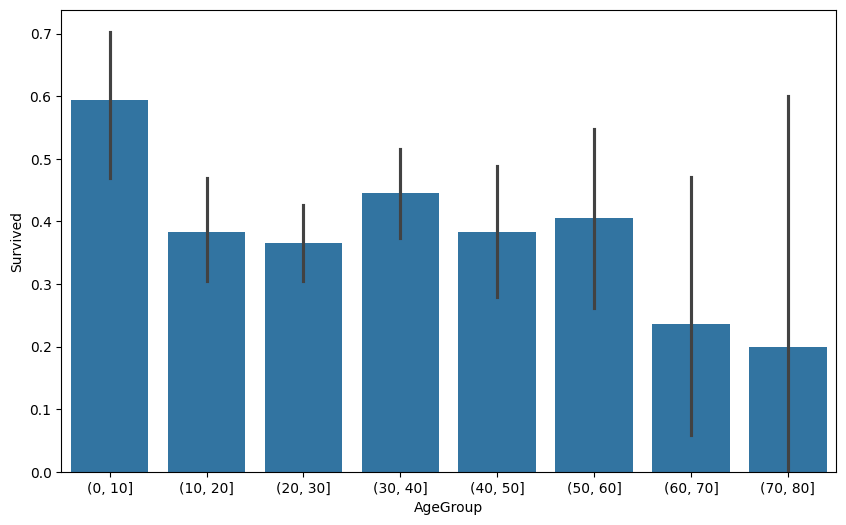

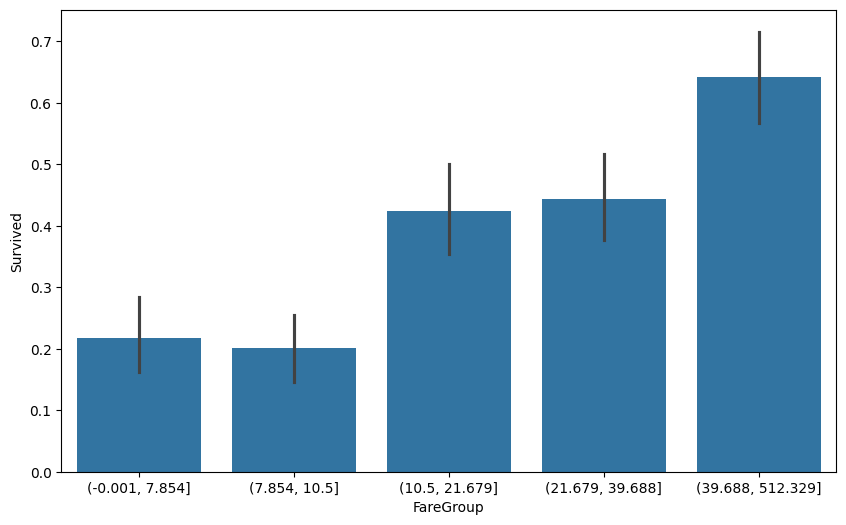

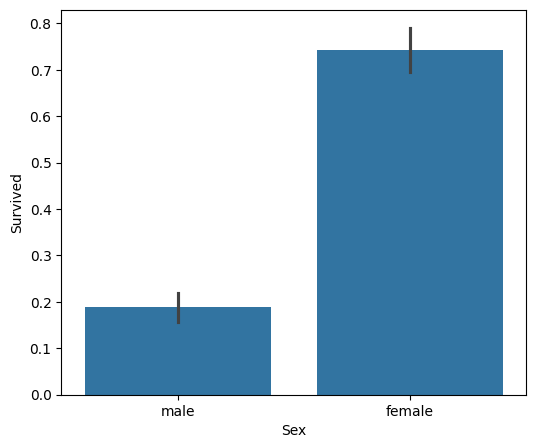

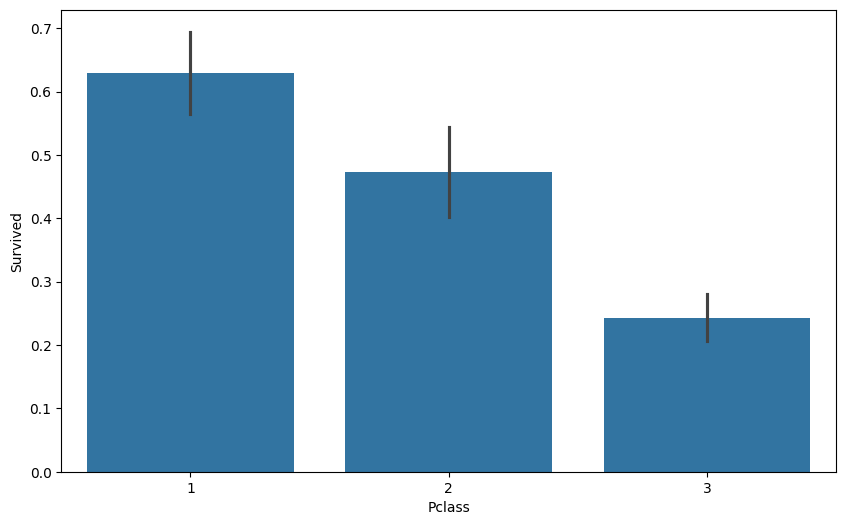

In [66]:
#6 가설설정 및 분석
# 나이별 생존률
# 결과: 10대 미만의 경우 유의미하게 생존률이 높은 것으로 보임
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
age_survival = df.groupby('AgeGroup')['Survived'].mean()
print(age_survival)
# 운임별 생존률
# 결과: 10.5 미만/ 10.5 ~ 39.688/ ~512 의 경우 생존률의 유의미한 차이가 있는 것으로 보임
plt.figure(figsize=(10, 6))
df['FareGroup'] = pd.qcut(df['Fare'], q=5)
sns.barplot(x='FareGroup', y='Survived', data=df)
fare_survival = df.groupby('FareGroup')['Survived'].mean()
print(fare_survival)
# 성별 생존률
# 결과: 남성과 여성사이의 유의미한 생존률 차이가 있는 것으로 보임
plt.figure(figsize=(6, 5))
sns.barplot(x='Sex', y='Survived', data=df)
sex_survival = df.groupby('Sex')['Survived'].mean()
print(sex_survival)
# 객실 등급별 생존률
# 결과: 각 등급별 생존률의 차이가 있는 것으로 보임
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=df)
Pclass_survival = df.groupby('Pclass')['Survived'].mean()
print(Pclass_survival)

